The data is from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport).

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

flights2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")

display(flights2022.head())
display(flights_weather2022.head())


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [42]:
flights2022["route"] = flights2022["origin"] + "-" + flights2022["dest"]
display(flights2022.head())


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,SEA-IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,SEA-FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,SEA-ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,PDX-ORD


In [43]:
routes_delays_cancels = flights2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head()

top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head()

print("Top 5 routes by mean departure delay")
print(top_routes_by_delay)

print("\nTop 5 routes by total cancellations")
print(top_routes_by_cancellations)


Top 5 routes by mean departure delay
       route  mean_dep_delay  total_cancellations
13   PDX-DSM       35.782609                    0
19   PDX-GRR       35.739130                    2
17   PDX-FLL       30.893617                    3
109  SEA-MIA       29.916667                    4
71   SEA-CLT       27.313199                   14

Top 5 routes by total cancellations
       route  mean_dep_delay  total_cancellations
103  SEA-LAX        7.195969                   93
58   SEA-ANC        9.316991                   78
137  SEA-SFO        7.054403                   73
102  SEA-LAS        8.943503                   73
121  SEA-PDX        7.730982                   71


C:\Users\Windows\AppData\Local\Temp\ipykernel_15244\2648901103.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes_by_delay["route"], rotation=90)


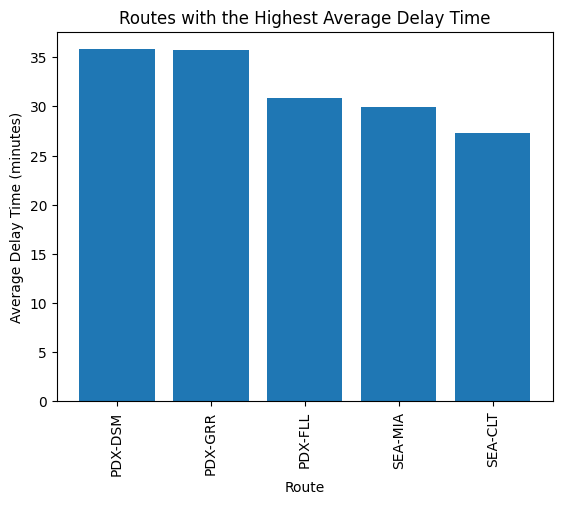

In [44]:
top5_route_delays_bar, ax = plt.subplots()
ax.bar(top_routes_by_delay["route"], top_routes_by_delay["mean_dep_delay"])
ax.set_xlabel("Route")
ax.set_ylabel("Average Delay Time (minutes)")
ax.set_title("Routes with the Highest Average Delay Time")
ax.set_xticklabels(top_routes_by_delay["route"], rotation=90)
plt.show()


C:\Users\Windows\AppData\Local\Temp\ipykernel_15244\1532338930.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


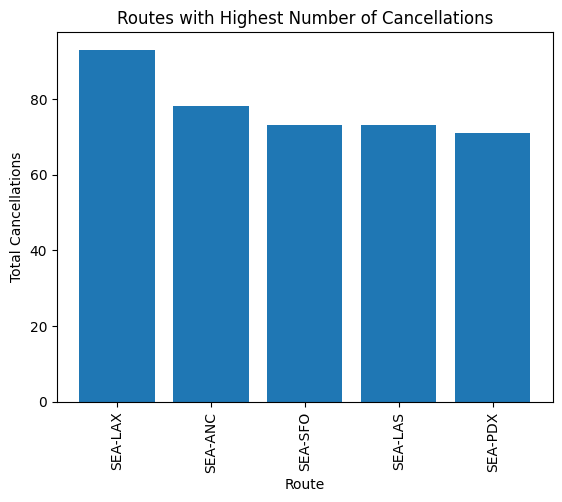

In [45]:
top5_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()


In [46]:
airlines_delays_cancels = flights2022.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()

top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head()

top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head()

print("Top 5 airlines by mean departure delay")
print(top_airlines_by_delay)

print("\nTop 5 airlines by total cancellations")
print(top_airlines_by_cancellations)


Top 5 airlines by mean departure delay
                  airline  mean_dep_delay  total_cancellations
7         JetBlue Airways       42.141524                   33
1           Allegiant Air       26.608696                    6
2  American Airlines Inc.       20.129903                   85
4  Frontier Airlines Inc.       14.355856                   12
9  Southwest Airlines Co.       11.407163                  100

Top 5 airlines by total cancellations
                  airline  mean_dep_delay  total_cancellations
0    Alaska Airlines Inc.        6.739282                 1300
3    Delta Air Lines Inc.       10.648634                  383
6             Horizon Air        6.270965                  238
8   SkyWest Airlines Inc.        4.596561                  165
9  Southwest Airlines Co.       11.407163                  100


C:\Users\Windows\AppData\Local\Temp\ipykernel_15244\3503065421.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)


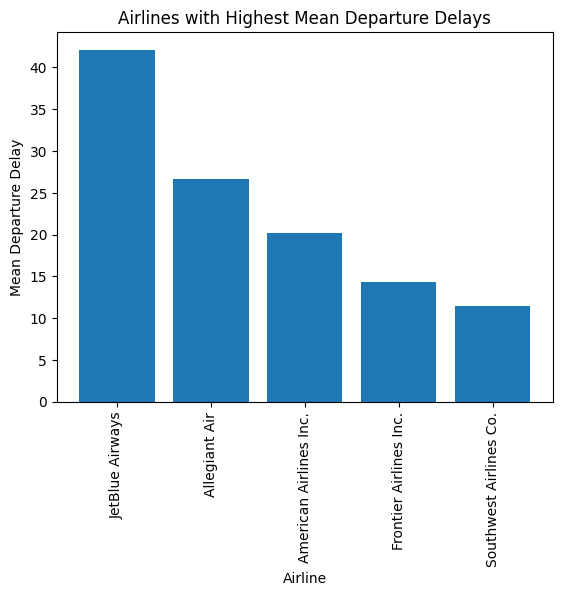

In [47]:
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()


C:\Users\Windows\AppData\Local\Temp\ipykernel_15244\1693145761.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_airlines_by_cancellations["airline"], rotation=90)


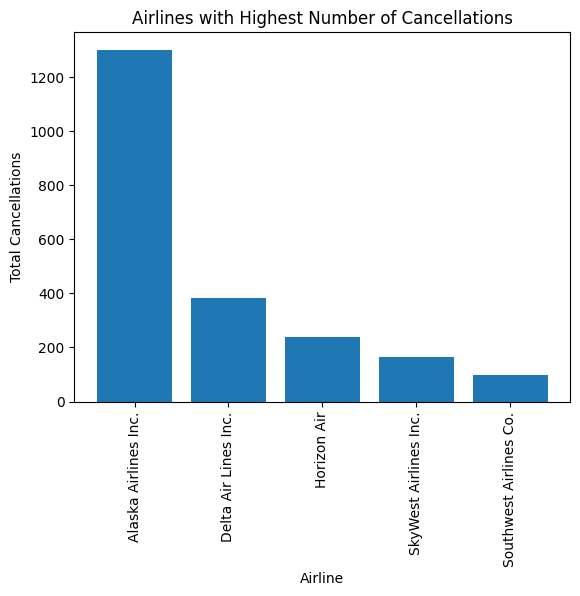

In [48]:
top_airlines_by_cancellations_bar, ax = plt.subplots()
ax.bar(top_airlines_by_cancellations["airline"], top_airlines_by_cancellations["total_cancellations"])
ax.set_xlabel("Airline")
ax.set_ylabel("Total Cancellations")
ax.set_title("Airlines with Highest Number of Cancellations")
ax.set_xticklabels(top_airlines_by_cancellations["airline"], rotation=90)
plt.show()


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,wind_gust_category
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,Moderate
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,High
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,Moderate
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,Moderate
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,Moderate


<Axes: xlabel='wind_gust_category'>

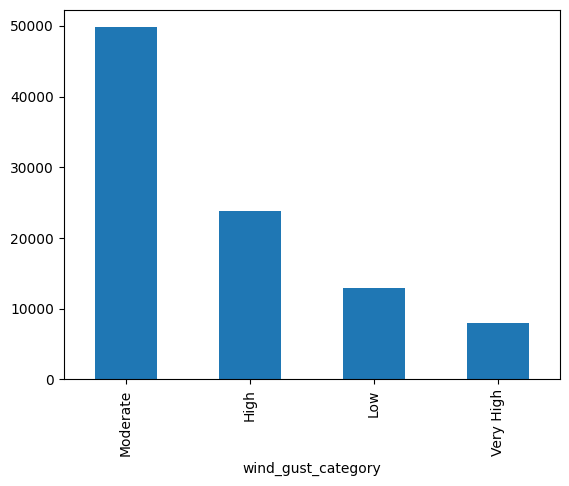

In [49]:

flights_weather2022['wind_gust_category'] = pd.cut(flights_weather2022['wind_gust'], bins=[0, 5, 10, 15, 20], labels=['Low', 'Moderate', 'High', 'Very High'])

display(flights_weather2022.head())

flights_weather2022['wind_gust_category'].value_counts().plot(kind='bar')
